In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
import datetime as DT
import calendar

from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon

%matplotlib inline

In [2]:
df_eventos = pd.read_csv('/home/lautaro/Desktop/events.csv',low_memory=False)

In [3]:
# función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return calendar.day_name[fecha.weekday()]

def model_split(model):
    return model.str.split(' ', expand=True)

def numero_a_mes(numero):
    return calendar.month_abbr[numero]

df_eventos['timestamp'] = pd.to_datetime(df_eventos['timestamp'], format='%Y-%m-%d')
df_eventos['timestamp_diaDelAnio'] = df_eventos["timestamp"].dt.dayofyear
df_eventos['timestamp_diaDeLaSemana'] = df_eventos["timestamp"].dt.dayofweek
df_eventos['timestamp_diaDeLaSemana_desc'] = df_eventos['timestamp'].map(fecha_a_dia)
df_eventos['timestamp_mes'] = df_eventos['timestamp'].dt.month
df_eventos["timestamp_mes_desc"] = df_eventos["timestamp_mes"].map(numero_a_mes)
df_eventos['model_marca'] =df_eventos.model.str.strip().str.split(' ', expand=True)[0]
df_eventos['model_tipo'] =df_eventos.model.str.strip().str.split(' ', expand=True)[1]
df_eventos['model_subtipo'] =df_eventos.model.str.strip().str.split(' ', expand=True)[2]
df_eventos['total'] = 1 # Para contabilizar eventos

In [173]:
visitas = df_eventos.loc[df_eventos["event"] == "visited site", ["timestamp", "timestamp_diaDeLaSemana", "total"]]

In [174]:
visitas["timestamp"] = pd.to_numeric(visitas["timestamp"].dt.hour)

In [175]:
visitas = visitas.groupby(["timestamp", "timestamp_diaDeLaSemana"], as_index=False).sum()

In [176]:
visitas.head()

,timestamp,timestamp_diaDeLaSemana,total
0,0,0,587
1,0,1,891
2,0,2,815
3,0,3,835
4,0,4,814


In [177]:
visitas = visitas.pivot("timestamp", "timestamp_diaDeLaSemana", "total")

Text(69,0.5,'Hora')

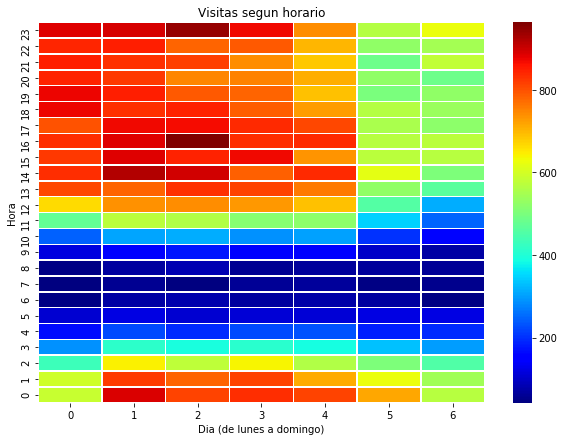

In [179]:
plt.subplots(figsize=(10,7))
grafico = sns.heatmap(visitas, linewidths = .5, cmap="jet")

plt.title("Visitas segun horario")
plt.xlabel("Dia (de lunes a domingo)")
plt.ylabel("Hora")

En primer lugar podemos observar que los fines de semana las visitas al sitio disminuyen, por otro lado el mayor pico de visitas al sitio se da los días miércoles entre los rangos de 16 a 17hs y 23 a 24 hs.